#### Importações

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [2]:
path = "../ailerons.csv"
data = pd.read_csv(path)
data


,ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,DiffDiffClb,...,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se,Goal
0,-17,-6,-0.03,0.14,0.59,-0.5,-11,-9,0.015,-0.2,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.6,0.021,-0.0008
1,-791,15,-0.28,-0.34,1.11,0.9,-10,27,-0.002,4.7,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.4,0.013,-0.0009
2,-46,48,-0.42,0.07,0.57,0.6,-5,-8,-0.008,0.0,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.019,-0.0005
3,496,-5,-0.21,-0.04,0.03,-0.5,-7,6,-0.002,-0.1,...,0.0,0.000,0.0,0.001,0.0,0.001,0.0,0.5,0.017,-0.0005
4,-124,16,-0.02,0.05,0.61,-0.2,-9,-3,0.000,0.0,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.018,-0.0006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13745,-53,-13,-0.07,0.02,0.58,-2.3,-15,12,0.022,-0.8,...,0.0,0.000,0.0,0.000,0.0,-0.001,0.0,0.5,0.019,-0.0007
13746,1,4,-0.11,-0.07,0.47,0.8,-5,8,-0.003,-0.2,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.016,-0.0004
13747,425,-14,0.40,0.07,0.41,-2.1,-16,12,0.031,-0.7,...,0.0,0.001,0.0,0.000,0.0,0.001,0.0,0.9,0.032,-0.0015
13748,102,-10,-0.19,0.08,1.30,0.5,-10,-3,-0.003,-0.2,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,1.4,0.051,-0.0015


#### Processamento

In [3]:
var_to_keep = ['ClimbRate', 'Sgz', 'P', 'Q', 'CurPitch', 'CurRoll', 'AbsRoll', 'DiffClb', 'DiffRollRate', 'DiffDiffClb', 
           'DiffSeTime1', 'DiffSeTime3', 'DiffSeTime5', 'DiffSeTime7', 'DiffSeTime9', 'DiffSeTime11', 'DiffSeTime13', 'Alpha', 'Se', 'Goal']

In [4]:
data = data[var_to_keep]

In [5]:
bins = [-np.inf, -0.0025, -0.0020, -0.0015, -0.0010, -0.0005, np.inf]
labels = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]

In [6]:
data['Goal'] = pd.cut(data['Goal'], bins=bins, labels=labels)

/tmp/ipykernel_910/3891302609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Goal'] = pd.cut(data['Goal'], bins=bins, labels=labels)


In [7]:
data

,ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,DiffDiffClb,DiffSeTime1,DiffSeTime3,DiffSeTime5,DiffSeTime7,DiffSeTime9,DiffSeTime11,DiffSeTime13,Alpha,Se,Goal
0,-17,-6,-0.03,0.14,0.59,-0.5,-11,-9,0.015,-0.2,0.000,-0.002,0.0,-0.002,0.000,0.000,0.000,0.6,0.021,4.0
1,-791,15,-0.28,-0.34,1.11,0.9,-10,27,-0.002,4.7,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.4,0.013,4.0
2,-46,48,-0.42,0.07,0.57,0.6,-5,-8,-0.008,0.0,-0.002,0.000,0.0,0.000,0.000,0.000,0.000,0.5,0.019,4.0
3,496,-5,-0.21,-0.04,0.03,-0.5,-7,6,-0.002,-0.1,-0.001,0.000,0.0,0.000,0.000,0.001,0.001,0.5,0.017,4.0
4,-124,16,-0.02,0.05,0.61,-0.2,-9,-3,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.5,0.018,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13745,-53,-13,-0.07,0.02,0.58,-2.3,-15,12,0.022,-0.8,0.000,0.000,0.0,0.000,0.000,0.000,-0.001,0.5,0.019,4.0
13746,1,4,-0.11,-0.07,0.47,0.8,-5,8,-0.003,-0.2,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.5,0.016,5.0
13747,425,-14,0.40,0.07,0.41,-2.1,-16,12,0.031,-0.7,0.000,0.000,0.0,0.000,0.001,0.000,0.001,0.9,0.032,2.0
13748,102,-10,-0.19,0.08,1.30,0.5,-10,-3,-0.003,-0.2,0.000,0.000,0.0,0.000,0.000,0.000,0.000,1.4,0.051,2.0


#### Modelos

##### Regressão logistica

In [67]:
X = data.drop('Goal', axis=1) 
y = data['Goal'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train)


/home/giro/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [68]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        25
         1.0       0.00      0.00      0.00        71
         2.0       0.00      0.00      0.00       300
         3.0       0.23      0.00      0.01      1069
         4.0       0.55      0.99      0.71      2275
         5.0       0.33      0.01      0.03       385

    accuracy                           0.55      4125
   macro avg       0.19      0.17      0.12      4125
weighted avg       0.39      0.55      0.39      4125



/home/giro/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/giro/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/giro/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


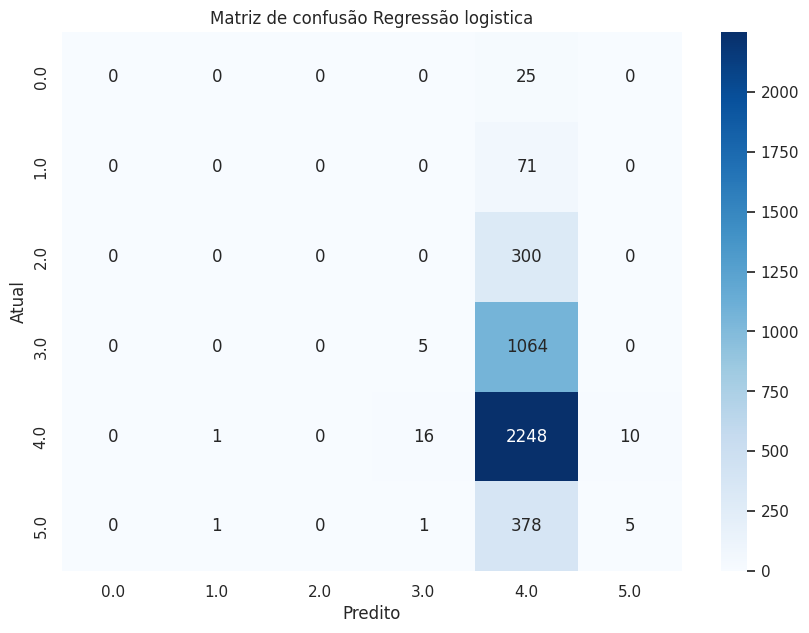

In [69]:
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predito')
plt.ylabel('Atual')
plt.title('Matriz de confusão Regressão logistica')
plt.show()

In [70]:

coefficients = model.coef_

odds_ratios = np.exp(coefficients)

odds_ratios_df = pd.DataFrame(odds_ratios, columns=data.drop("Goal",axis=1).columns)
odds_ratios_df = odds_ratios_df.T

odds_ratios_df

,0,1,2,3,4,5
ClimbRate,1.001378,1.000336,1.000068,1.000120,0.999795,0.998305
Sgz,1.002986,0.983067,1.011067,1.008530,1.003201,0.991437
P,1.001532,1.005251,1.017787,1.035928,0.971896,0.969292
Q,0.999499,1.002528,1.008047,1.007112,0.985436,0.997548
CurPitch,0.979025,0.991814,0.990992,0.971811,1.060239,1.008604
CurRoll,0.993684,0.991693,1.007673,1.041823,1.022495,0.945366
AbsRoll,1.396439,1.130882,0.907435,0.836137,0.832265,1.002780
DiffClb,1.020085,0.981658,1.016219,1.000086,0.988649,0.993887
DiffRollRate,1.000079,1.000058,1.000044,0.999934,0.999524,1.000361
DiffDiffClb,1.000909,1.001396,0.989184,0.992777,1.004808,1.011085


##### Naive bayes

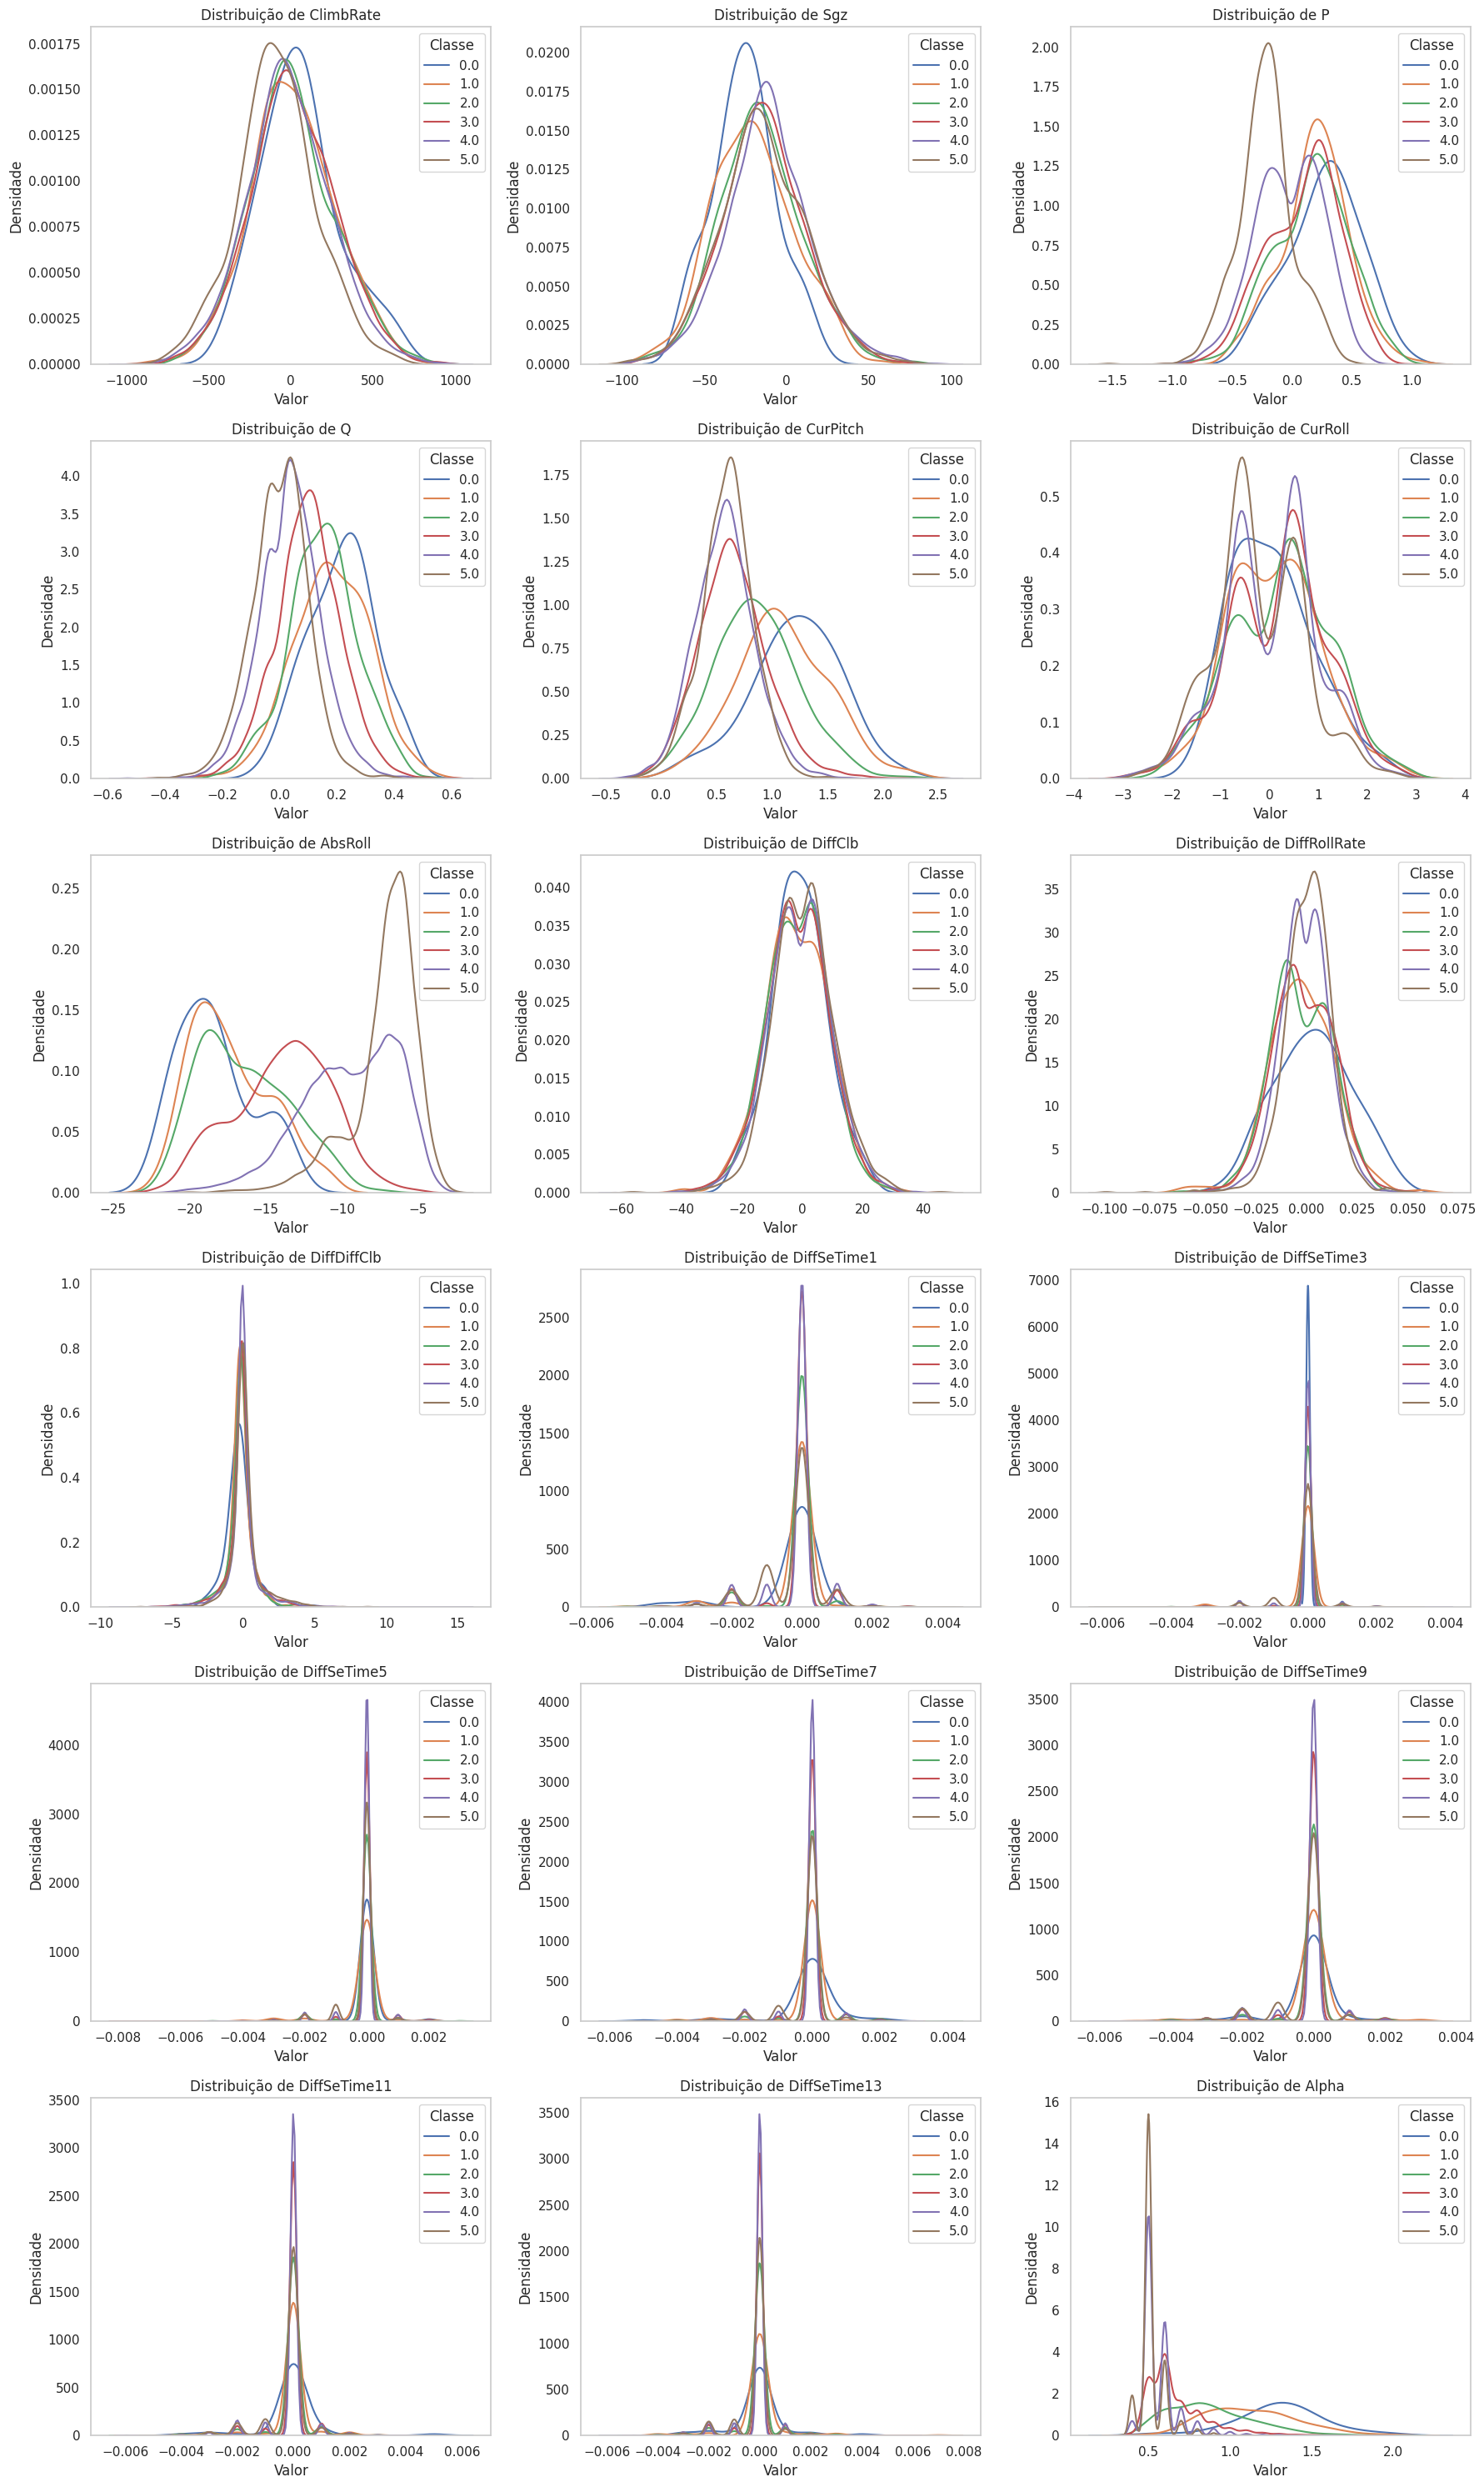

In [37]:
sns.set(style="whitegrid")

features = data.drop('Goal',axis=1).columns[:-1]  
classes = np.unique(y)

num_features = len(features)
num_rows = int(np.ceil(num_features / 3))  
plt.figure(figsize=(18, 5 * num_rows))

for i, feature in enumerate(features):
    plt.subplot(num_rows, 3, i + 1)
    for cls in classes:
        sns.kdeplot(data[data['Goal'] == cls][feature], label=cls)
    plt.title(f'Distribuição de {feature}')
    plt.xlabel('Valor')
    plt.ylabel('Densidade')
    plt.legend(title='Classe')
    plt.grid(False)

plt.tight_layout()
plt.show()

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.20      0.32        25
         1.0       0.28      0.35      0.31        71
         2.0       0.45      0.34      0.39       300
         3.0       0.63      0.49      0.56      1069
         4.0       0.73      0.84      0.78      2275
         5.0       0.46      0.42      0.44       385

    accuracy                           0.66      4125
   macro avg       0.57      0.44      0.47      4125
weighted avg       0.65      0.66      0.65      4125



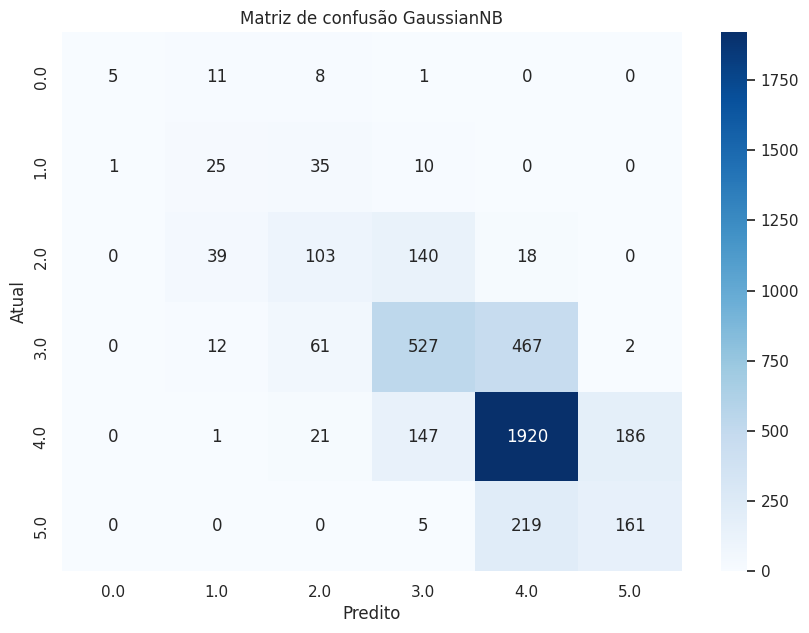

In [71]:
X = data.drop('Goal', axis=1)
y = data['Goal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = GaussianNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Classification Report:")
print(class_report)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predito')
plt.ylabel('Atual')
plt.title('Matriz de confusão GaussianNB')
plt.show()

##### Árvores de decisão

Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.16      0.27        25
         1.0       0.42      0.31      0.36        71
         2.0       0.52      0.49      0.50       300
         3.0       0.67      0.64      0.65      1069
         4.0       0.79      0.85      0.82      2275
         5.0       0.58      0.47      0.52       385

    accuracy                           0.72      4125
   macro avg       0.63      0.49      0.52      4125
weighted avg       0.71      0.72      0.71      4125



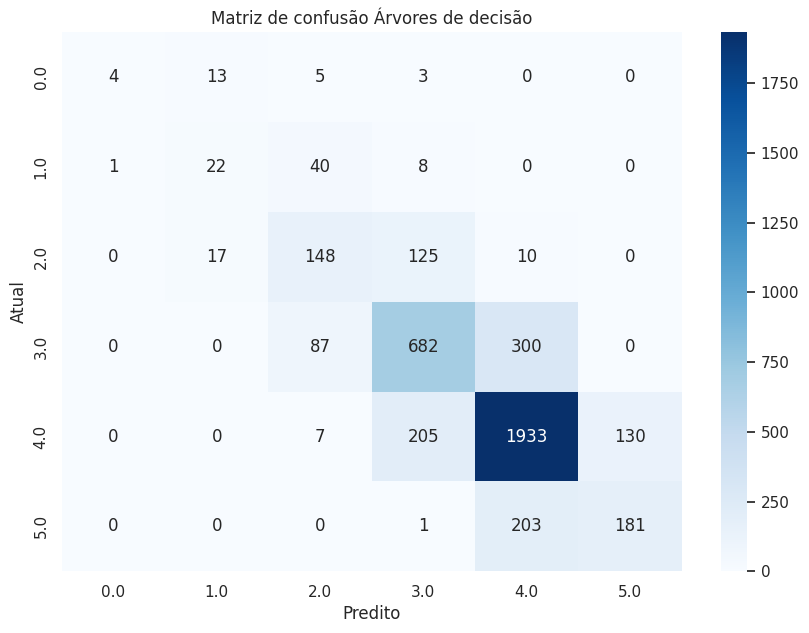

In [72]:
X = data.drop('Goal', axis=1)
y = data['Goal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': np.arange(1, 20)
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Classification Report:")
print(class_report)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predito')
plt.ylabel('Atual')
plt.title('Matriz de confusão Árvores de decisão')
plt.show()

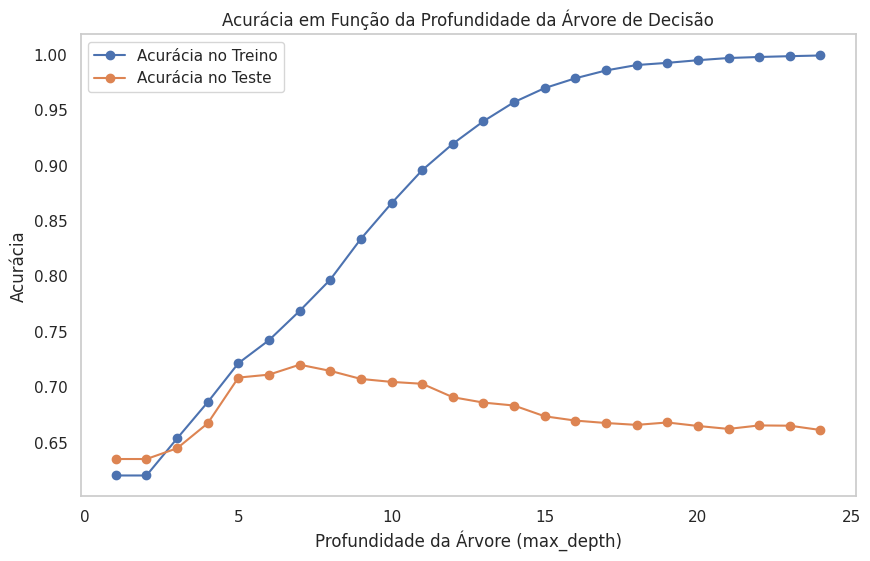

In [43]:
depths = range(1, 25)  
train_accuracies = []
test_accuracies = []

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, label='Acurácia no Treino', marker='o')
plt.plot(depths, test_accuracies, label='Acurácia no Teste', marker='o')
plt.xlabel('Profundidade da Árvore (max_depth)')
plt.ylabel('Acurácia')
plt.title('Acurácia em Função da Profundidade da Árvore de Decisão')
plt.legend()
plt.grid(False)
plt.show()

##### KNN

/home/giro/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/giro/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/giro/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Best Parameters: {'n_neighbors': 18}
Accuracy: 0.5692121212121212
Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        25
         1.0       0.00      0.00      0.00        71
         2.0       0.09      0.00      0.01       300
         3.0       0.45      0.21      0.29      1069
         4.0       0.59      0.93      0.72      2275
         5.0       0.23      0.01      0.02       385

    accuracy                           0.57      4125
   macro avg       0.23      0.19      0.17      4125
weighted avg       0.47      0.57      0.47      4125



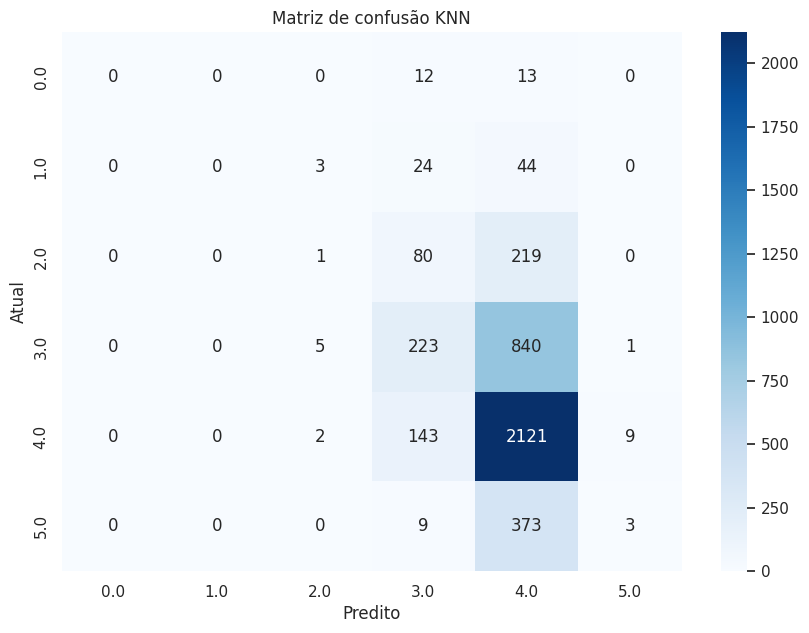

In [73]:
X = data.drop('Goal', axis=1)
y = data['Goal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = KNeighborsClassifier()

param_grid = {
    'n_neighbors': np.arange(1, 31),
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(class_report)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predito')
plt.ylabel('Atual')
plt.title('Matriz de confusão KNN')
plt.show()

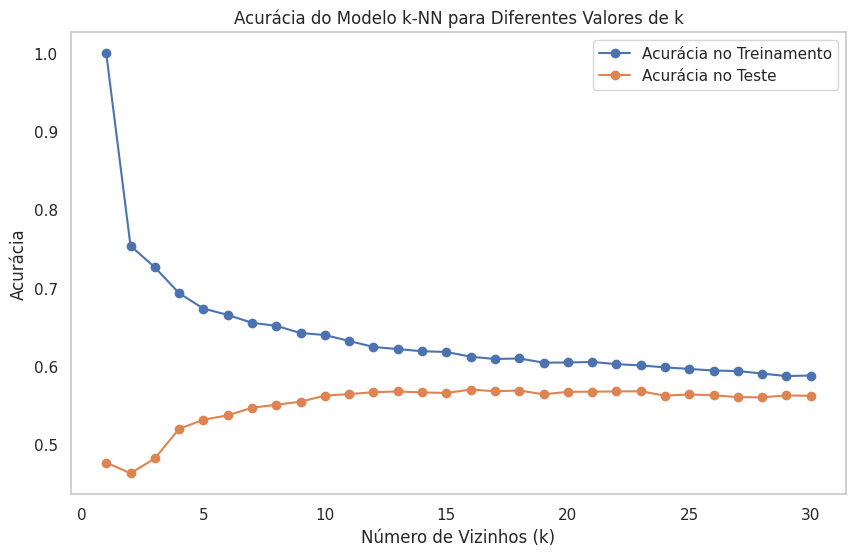

In [59]:
k_values = range(1, 31)  
train_accuracies = []
test_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train, y_train)
    
    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, label='Acurácia no Treinamento', marker='o')
plt.plot(k_values, test_accuracies, label='Acurácia no Teste', marker='o')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Acurácia')
plt.title('Acurácia do Modelo k-NN para Diferentes Valores de k')
plt.legend()
plt.grid(False)
plt.show()

##### XGBoost

In [63]:
X = data.drop('Goal', axis=1)
y = data['Goal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

param_grid = {
    'n_estimators': [50, 200],
    'max_depth': [4, 10],
    'learning_rate': [0.2, 1, 0.04]
}
results = []

for n_estimators in param_grid['n_estimators']:
    for max_depth in param_grid['max_depth']:
        for learning_rate in param_grid['learning_rate']:
            model = XGBClassifier(
                n_estimators=n_estimators,
                max_depth=max_depth,
                learning_rate=learning_rate,
                use_label_encoder=False,
            )
            
            model.fit(X_train, y_train)
            
            y_pred = model.predict(X_test)
            
            accuracy = accuracy_score(y_test, y_pred)
            
            results.append({
                'n_estimators': n_estimators,
                'max_depth': max_depth,
                'learning_rate': learning_rate,
                'accuracy': accuracy
            })

/home/giro/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:46:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/giro/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:46:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/giro/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:46:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/giro/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:46:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/giro/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:46:05] WARNING: /workspace/src/learner.

In [64]:
results_df = pd.DataFrame(results)
results_df

|    |   n_estimators |   max_depth |   learning_rate |   accuracy |
|---:|---------------:|------------:|----------------:|-----------:|
|  0 |             50 |           4 |            0.2  |   0.747879 |
|  1 |             50 |           4 |            1    |   0.742788 |
|  2 |             50 |           4 |            0.04 |   0.713697 |
|  3 |             50 |          10 |            0.2  |   0.754424 |
|  4 |             50 |          10 |            1    |   0.740364 |
|  5 |             50 |          10 |            0.04 |   0.749576 |
|  6 |            200 |           4 |            0.2  |   0.755152 |
|  7 |            200 |           4 |            1    |   0.739152 |
|  8 |            200 |           4 |            0.04 |   0.745455 |
|  9 |            200 |          10 |            0.2  |   0.748364 |
| 10 |            200 |          10 |            1    |   0.745697 |
| 11 |            200 |          10 |            0.04 |   0.752485 |


/home/giro/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [00:21:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/giro/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [00:21:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/giro/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [00:21:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/giro/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [00:21:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/giro/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [00:21:55] WARNING: /workspace/src/learner.

Melhores Parâmetros: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 50}
Melhor Pontuação de Validação: 0.7604155844155844
Accuracy: 0.7478787878787879
Classification Report:
              precision    recall  f1-score   support

         0.0       0.71      0.20      0.31        25
         1.0       0.45      0.34      0.39        71
         2.0       0.56      0.47      0.51       300
         3.0       0.70      0.68      0.69      1069
         4.0       0.80      0.89      0.84      2275
         5.0       0.67      0.44      0.53       385

    accuracy                           0.75      4125
   macro avg       0.65      0.50      0.55      4125
weighted avg       0.74      0.75      0.74      4125



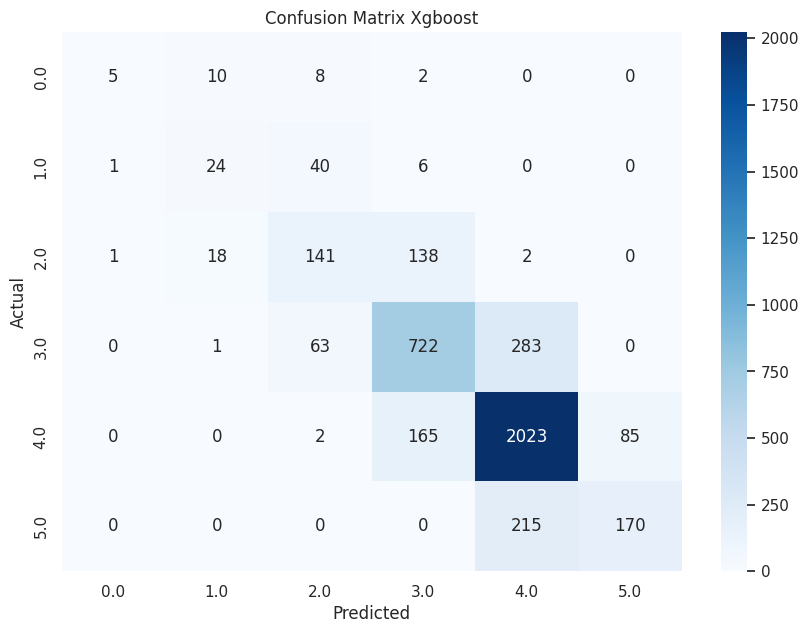

In [66]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

results = grid_search.cv_results_

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Melhores Parâmetros: {best_params}")
print(f"Melhor Pontuação de Validação: {best_score}")


best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(class_report)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de confusão Xgboost')
plt.show()